<a href="https://colab.research.google.com/github/1503-ng/An-lises-de-Dataframes-em-cursos-e-individualmente-/blob/master/estudo_corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/patient.csv')
df.head()


,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


#Fazendo a alteração dos nomes das colunas para melhor entendimento 

In [0]:
df = df.rename(columns={
    'patient_id':'paciente_id',
     'sex':'sexo',
     'birth_year':'ano_que_nasceu',
     'country':'pais',
     'region': 'regiao',
      'disease':'doenca',
      'group':'grupo',
      'infection_reason':'causa_da_infeccao',
      'infection_order':'ordem_de_infeccao',
      'infected_by':'infectado_por',
      'contact_number':'numero_de_contato',
      'confirmed_date':'data_de_confirmacao',
      'released_date':'data_de_liberacao',
      'deceased_date':'data_de_falecimento',
      'state':'estado'})
df

,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated


# Nesta query queria verificar quantas das pessoas registradas tínhamos a informação sobre o sexo delas, foi possível ver quantas informações 'Nan' nesta coluna possuía. 

In [0]:

df[(df.sexo == 'female') | (df.sexo == 'male')]
sexo = df[(df.sexo == 'female') | (df.sexo == 'male')]
sexo




,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5580,5581,male,2013.0,Korea,capital area,NaN,NaN,contact with patient,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5766,5767,male,1938.0,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased
5767,5768,female,1935.0,Korea,Gyeongsangbuk-do,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased
6284,6285,female,1929.0,Korea,Gyeongsangbuk-do,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06,NaN,2020-03-04,deceased


#Aqui queria saber qual a idade das pessoas que tiveram casos confirmados para entender se existe algum padrão.

In [0]:
idade = 2020 - (df['ano_que_nasceu'])
idade

df['idade']= idade
print(df)

      paciente_id    sexo  ano_que_nasceu  ... data_de_falecimento    estado  idade
0               1  female          1984.0  ...                 NaN  released   36.0
1               2    male          1964.0  ...                 NaN  released   56.0
2               3    male          1966.0  ...                 NaN  released   54.0
3               4    male          1964.0  ...                 NaN  released   56.0
4               5    male          1987.0  ...                 NaN  released   33.0
...           ...     ...             ...  ...                 ...       ...    ...
7864         7865     NaN             NaN  ...                 NaN  isolated    NaN
7865         7866     NaN             NaN  ...                 NaN  isolated    NaN
7866         7867     NaN             NaN  ...                 NaN  isolated    NaN
7867         7868     NaN             NaN  ...                 NaN  isolated    NaN
7868         7869     NaN             NaN  ...                 NaN  isolated

In [0]:
##homens registrados = 286#

df[df.sexo == 'male']
masculino = df[df.sexo == 'male']
masculino

,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado,idade
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,33.0
5,6,male,1964.0,Korea,capital area,NaN,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaN,released,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5459,5460,male,1940.0,Korea,Gyeongsangbuk-do,1.0,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,2020-03-05,deceased,80.0
5533,5534,male,1974.0,Korea,Jeju-do,NaN,NaN,visit to Daegu,74.0,NaN,74.0,2020-03-04,NaN,NaN,isolated,46.0
5580,5581,male,2013.0,Korea,capital area,NaN,NaN,contact with patient,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated,7.0
5766,5767,male,1938.0,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased,82.0


In [0]:
df[df.sexo == 'female']
feminino = df[df.sexo == 'female']
feminino

,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado,idade
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0
7,8,female,1957.0,Korea,Jeollabuk-do,NaN,NaN,visit to Wuhan,1.0,NaN,113.0,2020-01-31,2020-02-12,NaN,released,63.0
8,9,female,1992.0,Korea,capital area,NaN,NaN,contact with patient,2.0,5.0,2.0,2020-01-31,2020-02-24,NaN,released,28.0
9,10,female,1966.0,Korea,capital area,NaN,NaN,contact with patient,3.0,6.0,43.0,2020-01-31,2020-02-19,NaN,released,54.0
13,14,female,1980.0,China,capital area,NaN,NaN,contact with patient,3.0,12.0,3.0,2020-02-02,2020-02-18,NaN,released,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,4892,female,2009.0,Korea,capital area,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated,11.0
5025,5026,female,1973.0,Korea,capital area,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated,47.0
5172,5173,female,1974.0,Korea,capital area,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated,46.0
5767,5768,female,1935.0,Korea,Gyeongsangbuk-do,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased,85.0


In [0]:
#quantas pessoas possuem sexo indefinido? 7190 #

df[(df.sexo != 'female') != (df.sexo != 'male')]
sexo_indefinido = df[(df.sexo != 'female') & (df.sexo != 'male')]
sexo_indefinido


,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado,idade
91,92,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20,NaN,NaN,isolated,NaN
92,93,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20,NaN,NaN,isolated,NaN
93,94,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20,NaN,NaN,isolated,NaN
94,95,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20,NaN,NaN,isolated,NaN
95,96,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20,NaN,NaN,isolated,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated,NaN
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated,NaN
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated,NaN
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated,NaN


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df.describe(include='all')

,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado,idade
count,7869.000000,679,666.000000,7869,437,28.0,86,154,36.000000,70.000000,53.000000,7869,56,36,7869,666.000000
unique,NaN,2,NaN,3,14,NaN,4,14,NaN,NaN,NaN,37,21,16,3,NaN
top,NaN,female,NaN,Korea,capital area,NaN,Shincheonji Church,contact with patient,NaN,NaN,NaN,2020-03-01,2020-03-04,2020-03-05,isolated,NaN
freq,NaN,393,NaN,7860,191,NaN,58,76,NaN,NaN,NaN,1062,11,6,7777,NaN
mean,3935.000000,NaN,1974.271772,NaN,NaN,1.0,NaN,NaN,4.277778,379.000000,67.849057,NaN,NaN,NaN,NaN,45.728228
std,2271.728967,NaN,17.423250,NaN,NaN,0.0,NaN,NaN,12.032364,540.247528,177.723575,NaN,NaN,NaN,NaN,17.423250
min,1.000000,NaN,1929.000000,NaN,NaN,1.0,NaN,NaN,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,2.000000
25%,1968.000000,NaN,1962.000000,NaN,NaN,1.0,NaN,NaN,1.000000,29.250000,3.000000,NaN,NaN,NaN,NaN,30.000000
50%,3935.000000,NaN,1974.000000,NaN,NaN,1.0,NaN,NaN,2.000000,126.000000,17.000000,NaN,NaN,NaN,NaN,46.000000
75%,5902.000000,NaN,1990.000000,NaN,NaN,1.0,NaN,NaN,3.000000,563.250000,45.000000,NaN,NaN,NaN,NaN,58.000000


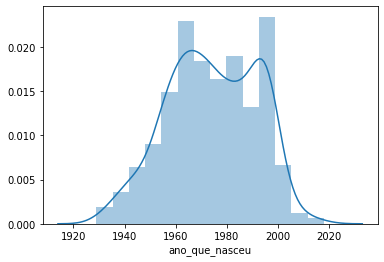

In [0]:
sns.distplot(df['ano_que_nasceu'])

In [0]:
df[df.pais == 'Korea']
coreia= df[df.pais == 'Korea' ]
coreia

,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado,idade
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,33.0
5,6,male,1964.0,Korea,capital area,NaN,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaN,released,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated,NaN
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated,NaN
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated,NaN
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated,NaN
